<a href="https://colab.research.google.com/github/ba88052/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 2 鐵達尼號存活預測 - 建立第一個 Baseline 版本

1. 在你的 Colab 程式碼中載入 `train.csv` 資料集，可以參考這一篇 教學。

In [23]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/train.csv"
url_test = "https://raw.githubusercontent.com/ba88052/titanic-analysis/main/Titanic_Data/test.csv"
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [20]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. 請瞭解該資料中所有欄位的定義為何？

Survived: 0 = No 1 = Yes

PassengerId: ID號碼，從1到891號

Sex: 男女生理性別 male= 男 female= 女 （需轉成編碼）

SibSp: 兄弟姊妹或是配偶數量
兄弟姐妹=兄弟，姐妹，繼兄弟，繼妹
配偶=丈夫，妻子（情婦和未婚夫被忽略）

Age: 年歲 年齡小於1時為小數。如果年齡是估計的，是xx.5的形式嗎

Name:名字 可拿掉

Embarked: 登船港口 C = Cherbourg, Q = Queenstown, S = Southampton 需轉成one hot編碼

Fare: 乘客票價

Cabin: 客艙號（有許多遺漏值）

Pclass: 倉位 1 = 1st, 2 = 2nd, 3 = 3rd 

Parch: 父母或孩子
父母=母親，父親
孩子 = 女兒、兒子、繼女、繼子
有些孩子只和保姆一起旅行，因此他們的 parch=0。

Ticket: 船票編號


3. 進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。

In [31]:
#查看資料型態
df_train.describe()
# df_train.describe(include=[object])
# df_train.describe(include='all')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [24]:
#初步清理資料
#刪除姓名欄
df_train = df_train.drop("Name",axis=1)

#將性別轉成編碼
sex_encoding = {
    'male': 0,
    'female': 1
}
df_train['Sex'] = df_train['Sex'].map(lambda d: sex_encoding[d])

#將艙等獨熱編碼
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

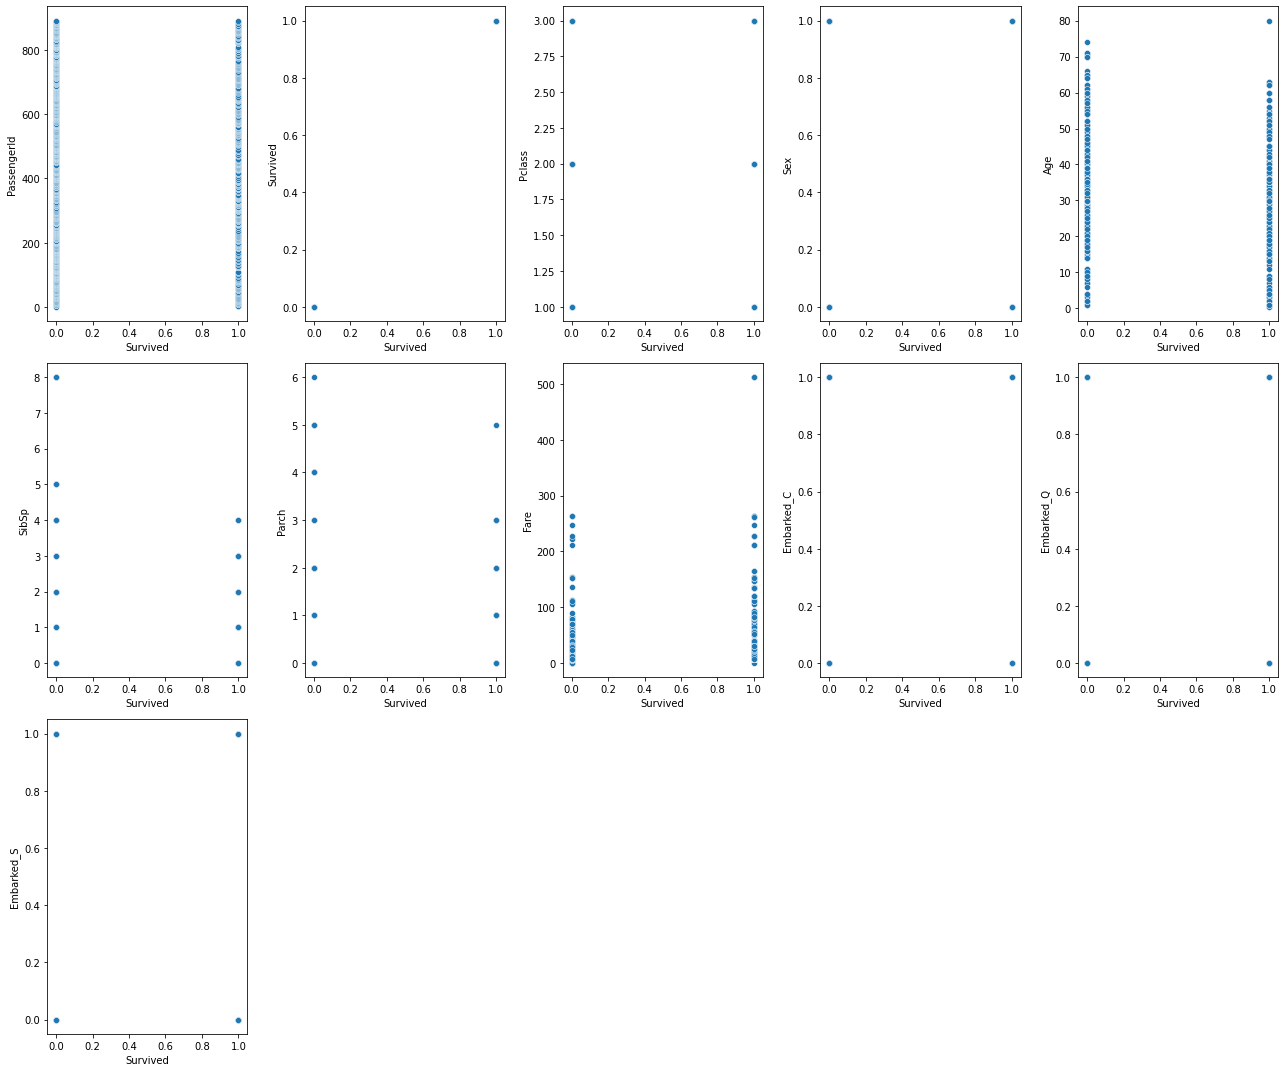

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 15)) # 調整圖表大小

# 特徵值與label的分佈圖
for idx, cols in enumerate(df_train):
    ax = plt.subplot(3, 5, idx+1)
    sns.scatterplot(x = df_train['Survived'], y = df_train[cols])

plt.tight_layout()
plt.show()
# 找出與label相關的特徵們

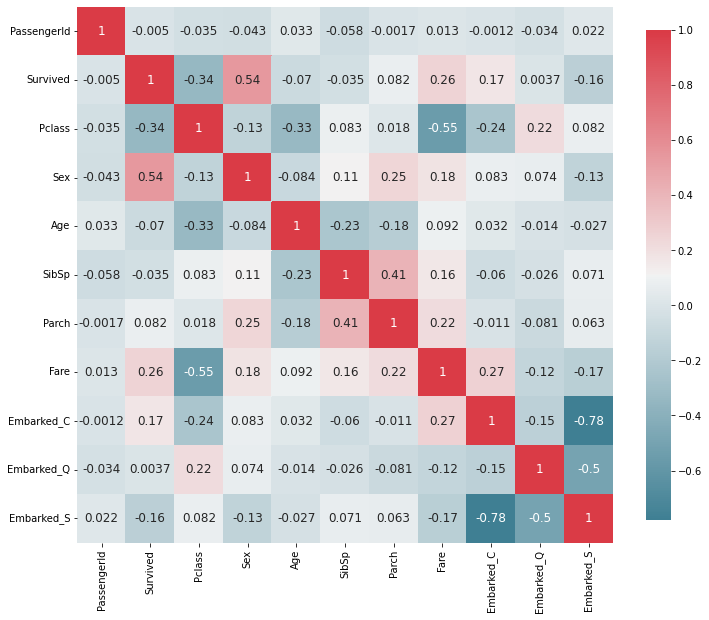

In [39]:
#相關係數熱圖 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_train.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

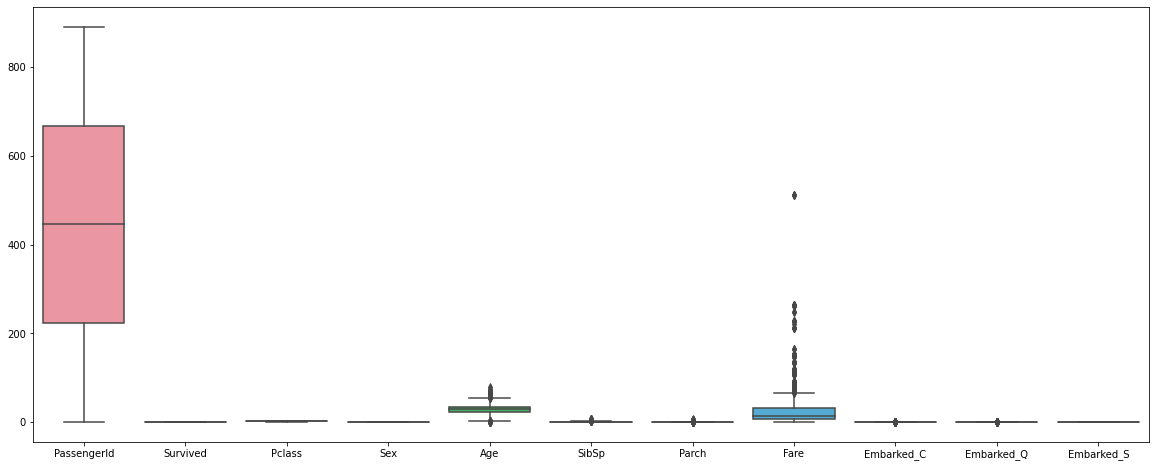

In [40]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df_train, width = 0.8)
plt.show()

4. 請進行「必要」的資料前處理操作，讓資料變成可以跑得動模型的格式即可。

In [45]:
try:
  df_train = df_train.drop(["Name", "Ticket", "Cabin"],axis=1)
  df_train["Age"].fillna(value = df_train["Age"].mean(), inplace = True)
except:
  print("已經修改完成")

已經修改完成


In [46]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,1,0,7.2500,0,0,1
1,2,1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,1,26.000000,0,0,7.9250,0,0,1
3,4,1,1,1,35.000000,1,0,53.1000,0,0,1
4,5,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,0,0,1
887,888,1,1,1,19.000000,0,0,30.0000,0,0,1
888,889,0,3,1,29.699118,1,2,23.4500,0,0,1
889,890,1,1,0,26.000000,0,0,30.0000,1,0,0


5. 最後請將資料接著執行下方範例，看看能否產出結果呢。

In [47]:
columns_X = set(df_train.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_train[columns_X]
train_y = df_train[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores
#random_state：隨機數種子，int類型，可選參數，默認爲無，僅在正則化優化算法爲sag,liblinear時有用。
#max_iter：算法收斂最大迭代次數，int類型，默認爲10。僅在正則化優化算法爲newton-cg, sag和lbfgs纔有用，算法收斂的最大迭代次數。/

array([0.78212291, 0.78651685, 0.78089888, 0.76966292, 0.81460674])